## Empirics for government spending

This file downloads and plots average tax rates and debt-to-gdp ratios across countries.  

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'COU',
       'Country', 'INCOMEAW', 'Income as a percentage of the average wage',
       'AVGRATES', 'Average tax rates and wedges', 'TIME_PERIOD', 'Year',
       'OBS_VALUE', 'Observation Value', 'OBS_STATUS', 'Observation Status',
       'UNIT_MEASURE', 'Unit of Measures', 'UNIT_MULT', 'Multiplier',
       'BASE_PER', 'Base reference period'],
      dtype='object')


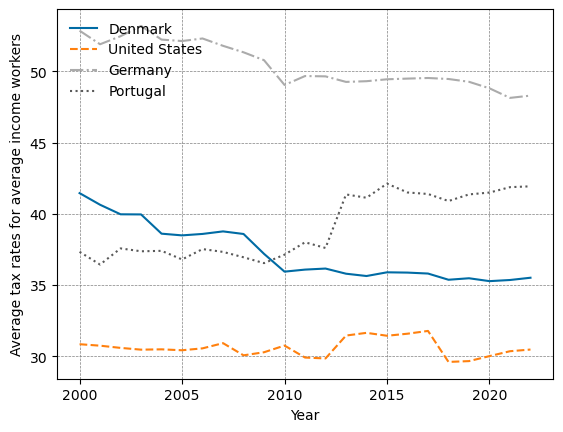

In [10]:
## Income tax rates
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import eurostat
import pandas as pd

plt.style.use('tableau-colorblind10')
lines = ["-","--","-.",":","-","--","-.",":"]


url = 'https://sdmx.oecd.org/archive/rest/data/OECD,DF_TABLE_I5,/USA+DNK+PRT+DEU.100.?startPeriod=2000&endPeriod=2022&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
tax = pd.read_csv(url) 

country_set = ('DNK','USA', 'DEU', 'PRT')
country_label = ('Denmark','United States', 'Germany', 'Portugal')

## Gross Domestic Product, millions, national currency, current prices
for cc in range(4):
    country = country_set[cc]
    clabel = country_label[cc]
    selector = ((tax['AVGRATES'] == 'TOT_TAX_WEDGE') &(tax['COU'] == country) )
    tax_1 = tax.loc[selector]
    tax_1 = tax_1.sort_values(by= 'TIME_PERIOD')
    
    plt.plot(tax_1.TIME_PERIOD,tax_1.OBS_VALUE, label = clabel, linestyle = lines[cc])

    
plt.legend(frameon=False,loc = 'upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Average tax rates for average income workers')
plt.xlabel('Year')
plt.savefig('taxrates.pdf')





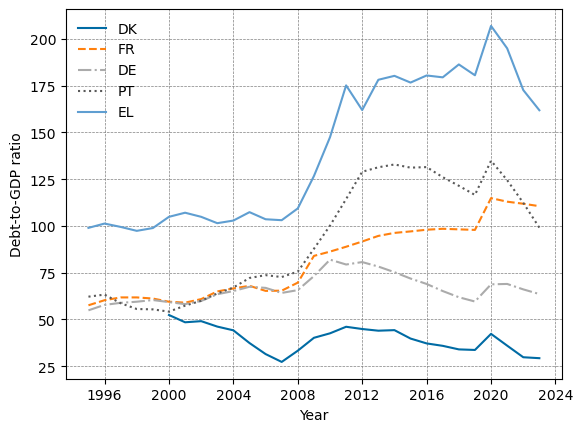

In [14]:
## Eurostat

debt = eurostat.get_data_df('gov_10dd_edpt1') #Monthly unemployment rate, percentage of labor force
#print(debt.sector.unique())
#unit: PC_GDP sector:S13 na_item:GD

debt = debt.loc[debt['unit'] == 'PC_GDP'] #Unemployment rate for individuals aged 25-74
debt = debt.loc[debt['sector'] == 'S13'] #both sexes
debt = debt.loc[debt['na_item'] == 'GD'] #seasonally adjusted 

debt = debt.drop(['freq','unit','sector','na_item'],axis=1)  #drop the columns that are no longer needed
debt = pd.melt(debt, id_vars=['geo\TIME_PERIOD'], var_name='time', value_name='value') #Reshape the data into long format
debt = debt.rename(columns={"geo\TIME_PERIOD": "country", "time": "year"})
debt['yy'] = pd.to_datetime(debt['year'])


countrylist = ('DK','FR', 'DE','PT','EL') #List of countries to be plotted
cc=0
for country in countrylist:
    temp = debt.loc[debt['country'] == country] #Unemployment rate for individuals aged 25-74
    
    plt.plot(temp.yy,temp.value, label = country, linestyle = lines[cc])
    cc+=1
plt.legend(frameon=False,loc = 'upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Debt-to-GDP ratio')
plt.xlabel('Year')
plt.savefig('debt_gdp.pdf')
plt.show()